In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [22]:
#data = load_breast_cancer()
df = pd.read_csv('/content/drive/MyDrive/bc dm/breast_cancer_data.csv') 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
#df = pd.DataFrame(data.data, columns=data.feature_names)
#print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
df.shape

(569, 33)

Data Preprocessing

In [25]:
# Getting all features
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [32]:
# we would proceed to drop Unnamed: 32 column
df = df.dropna(axis=1)

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
df.drop("id", axis=1, inplace=True)


In [34]:
df.shape

(569, 31)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [36]:
# inspecting our data types, (1)- int, (1)- object, the rest are float dtypes
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [37]:
#Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
# Here we can take a look at the value counts for the diagnosis column
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [39]:
df.iloc[0].values

array(['M', 17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
       0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
       0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0,
       0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189], dtype=object)

In [40]:
df.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


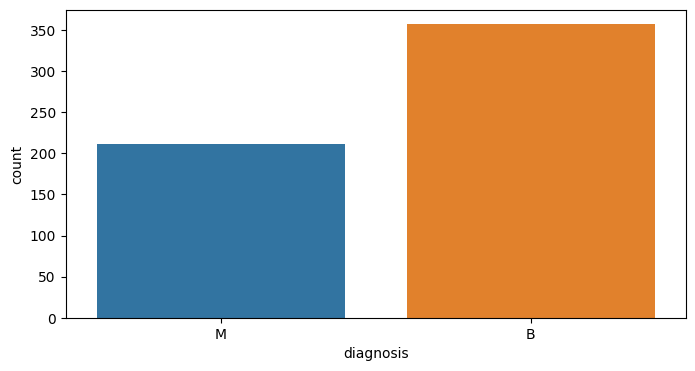

In [41]:
# plot a counter plot to better understand our target feature
plt.figure(figsize=(8,4))
sns.countplot(x = 'diagnosis',data = df)
plt.show()

Data Cleaning
Data cleaning is a technique that is applied to remove the noisy data and correct the inconsitancey in dataset. It involves trranformation to correct the wrong data.

Missing Values

In [42]:
# Checking for null Values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Our dataset contains two unnecessary columns so we drop them to clean our dataset

In [43]:
# Checking for duplicate rows in dataset
df.duplicated().sum()

0

Data Analysing
Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making.

In [44]:
#getting Mean columns with diagnosis
m_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean']

#getting Se columns with diagnosis
s_col= ['compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean']



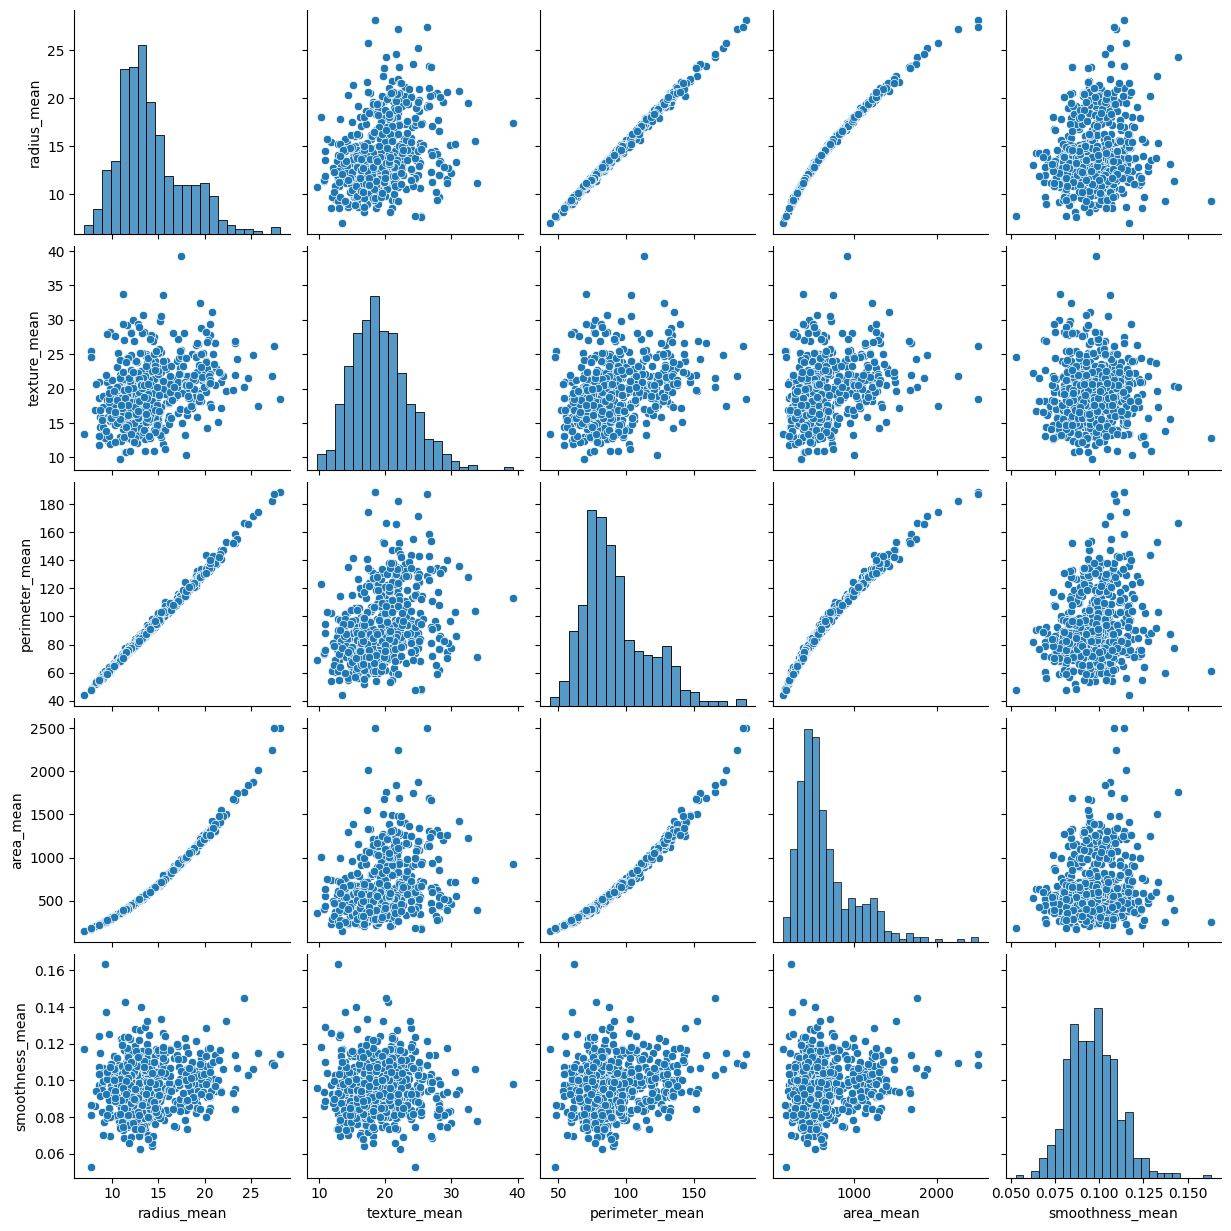

In [ ]:
#pairplot for mean columns
sns.pairplot(df[m_col],palette='Blues')

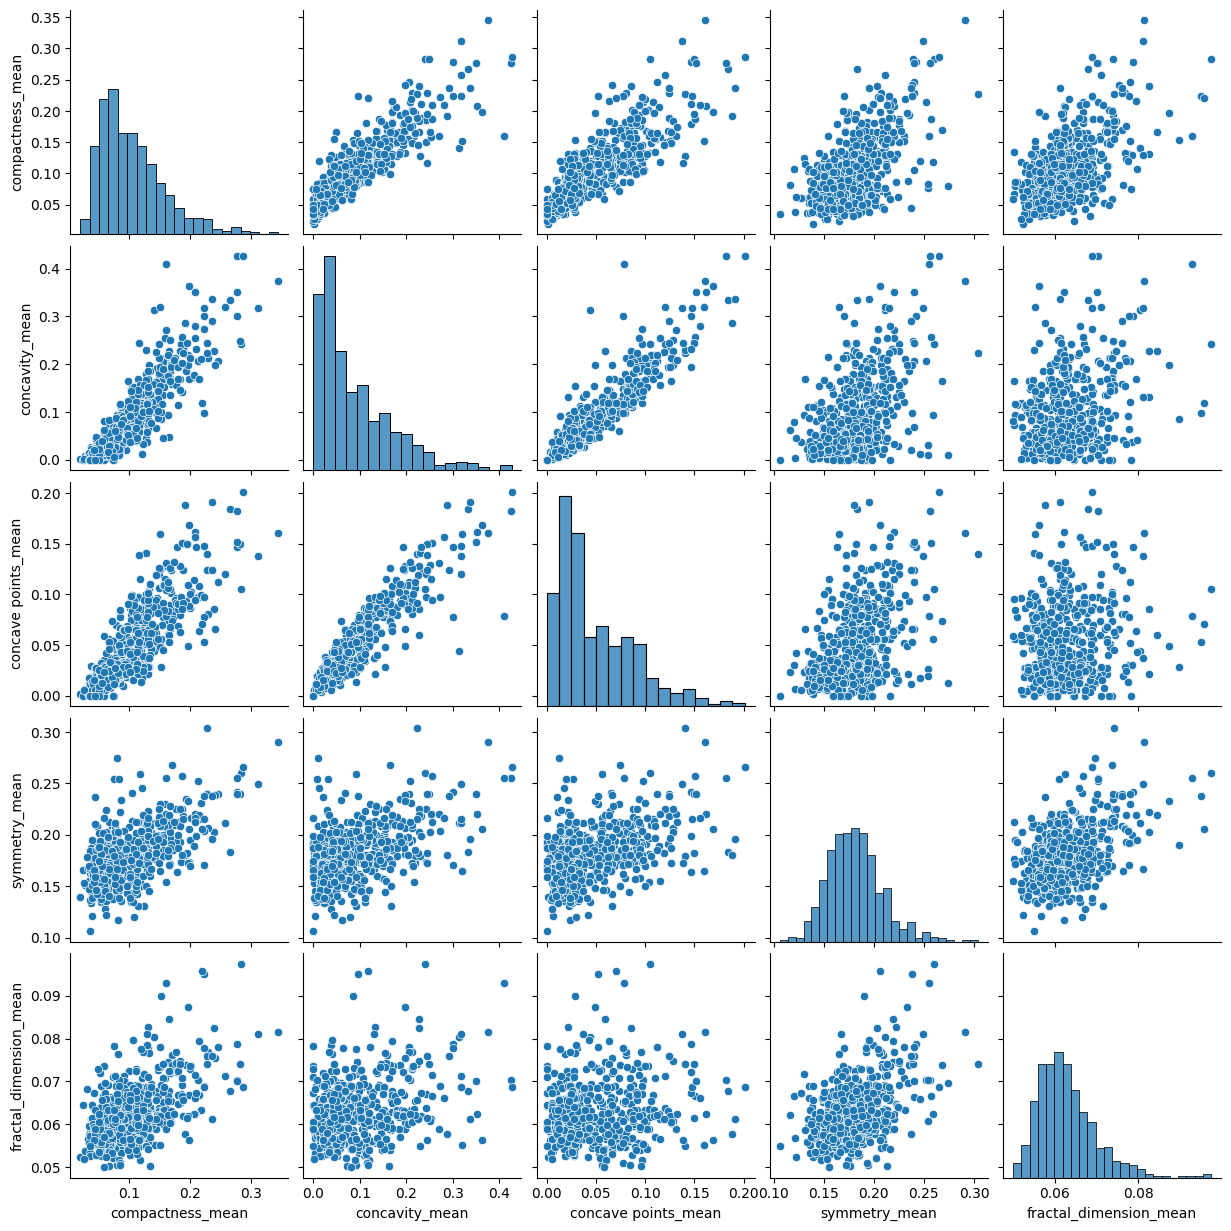

In [45]:


sns.pairplot(df[s_col],palette='Blues')

In [46]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

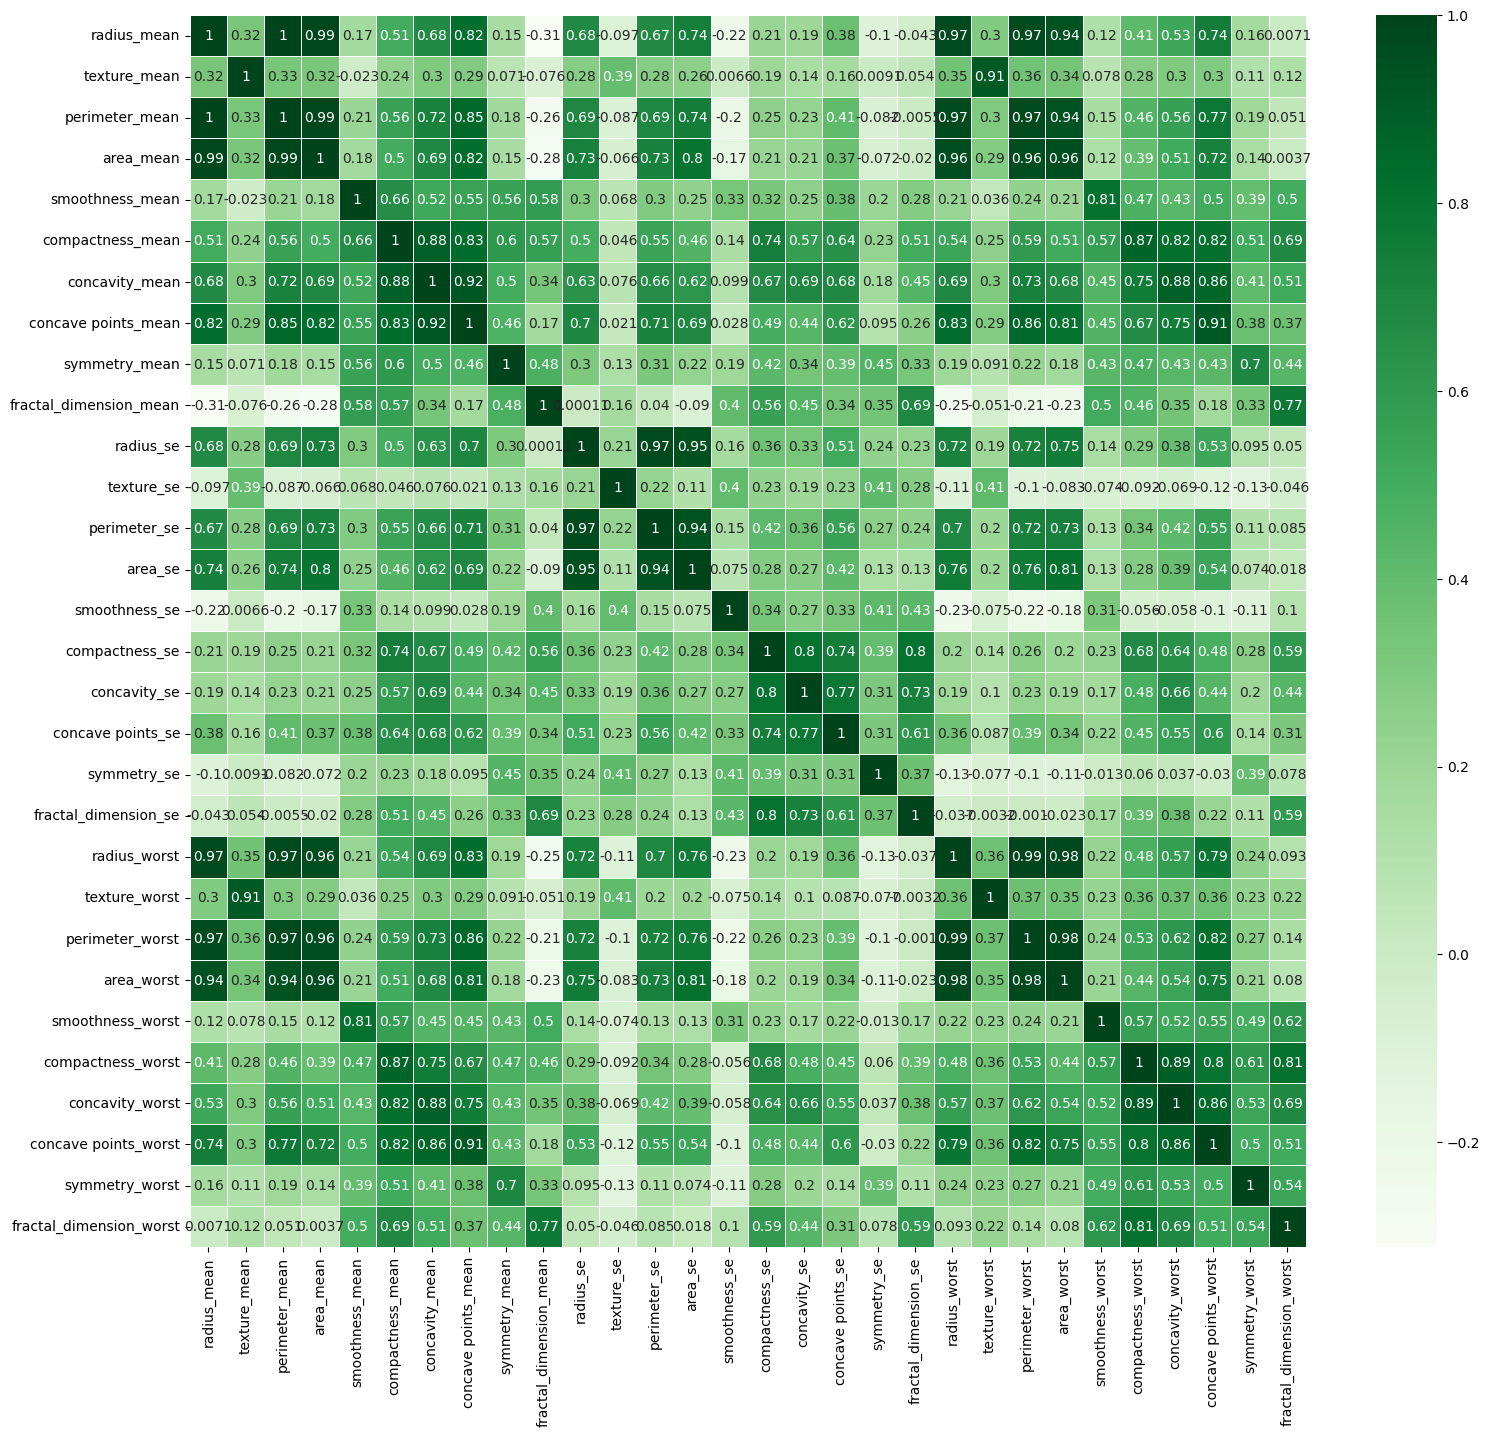

In [47]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True,linewidth=.5,cmap='Greens')

In [ ]:
# Here we can begin our machine learning model by import sklrean.

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()

df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [48]:
df.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [49]:
# lets now split our dataset into dependent (X) and independent (Y) datasets.

Y =df.pop('diagnosis')
X = df

In [50]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [51]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [53]:
X_test.iloc[0].values

array([1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
       1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
       3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
       1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
       1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01])

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

Accuracy_LR: 0.9649122807017544
Precision M: 0.975609756097561
Precision B: 0.958904109589041
Recall M: 0.9302325581395349
Recall B: 0.9859154929577465
F1 Score M: 0.9523809523809524
F1 Score B: 0.9722222222222222
AUC: 0.9970520799213889


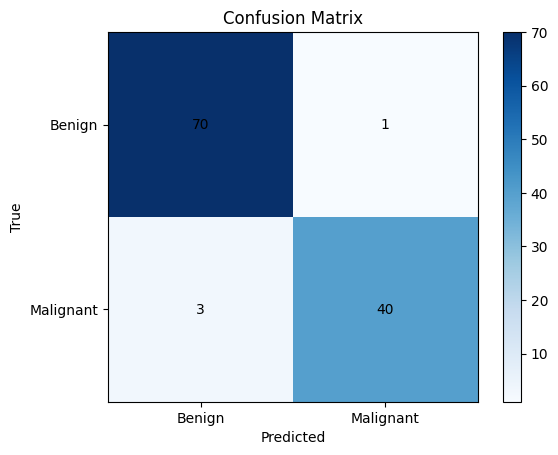

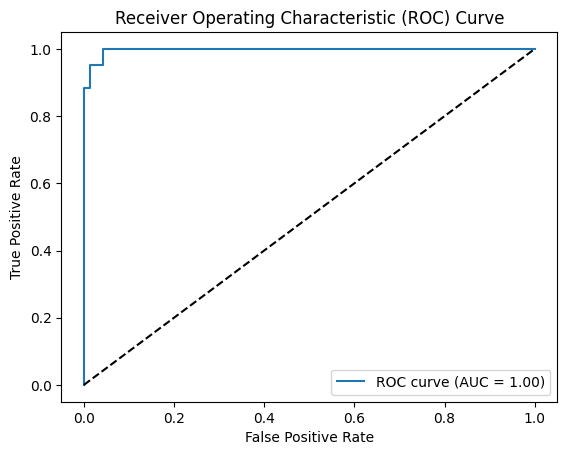

Sensitivity 0.93
Specificity 0.99
True positives: 40
True negatives: 70
False positives: 1
False negatives: 3


In [121]:
# LogisticRegression classifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
# Make predictions on the test data
Y_predict =lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
#Y_predict = lr.predict(X_test)

# Calculate evaluation metrics
accuracy_LR = accuracy_score(Y_test, Y_predict)
precision_M = precision_score(Y_test, Y_predict,pos_label='M')
precision_B = precision_score(Y_test, Y_predict,pos_label='B')
recall_M = recall_score(Y_test, Y_predict,pos_label='M')
recall_B = recall_score(Y_test, Y_predict,pos_label='B')
f1_M = f1_score(Y_test, Y_predict,pos_label='M')
f1_B= f1_score(Y_test, Y_predict,pos_label='B')
auc = roc_auc_score(Y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy_LR:", accuracy_LR)
print("Precision M:", precision_M)
print("Precision B:", precision_B)
print("Recall M:", recall_M)
print("Recall B:", recall_B)
print("F1 Score M:", f1_M)
print("F1 Score B:", f1_B)
print("AUC:", auc)

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba,pos_label='M')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Sensitivity_recallLR = metrics.recall_score(Y_test, Y_predict, pos_label='M')
print("Sensitivity %.2f" % Sensitivity_recallLR)
SpecificityLR = metrics.recall_score(Y_test, Y_predict, pos_label='B')
print("Specificity %.2f" % SpecificityLR)

conf_mat = confusion_matrix(Y_test, Y_predict)

# Extracting true positives, true negatives, false positives, and false negatives
tnLR, fpLR, fnLR, tpLR = confusion_matrix(Y_test, Y_predict).ravel()

print(f"True positives: {tpLR}")
print(f"True negatives: {tnLR}")
print(f"False positives: {fpLR}")
print(f"False negatives: {fnLR}")




Accuracy_DT: 0.9473684210526315
Precision M: 0.95
Precision B: 0.9459459459459459
Recall M: 0.9047619047619048
Recall B: 0.9722222222222222
F1 Score M: 0.9268292682926829
F1 Score B: 0.9589041095890412
AUC: 0.9877645502645502


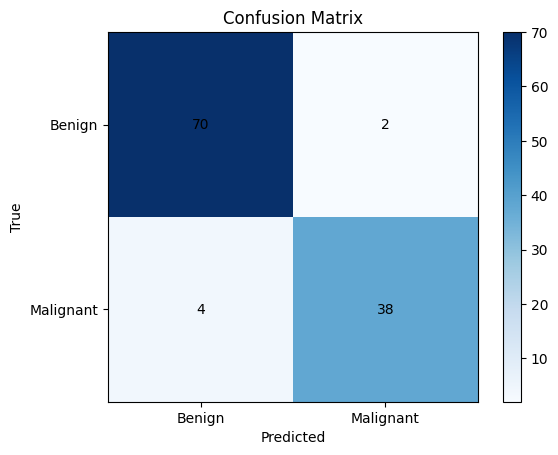

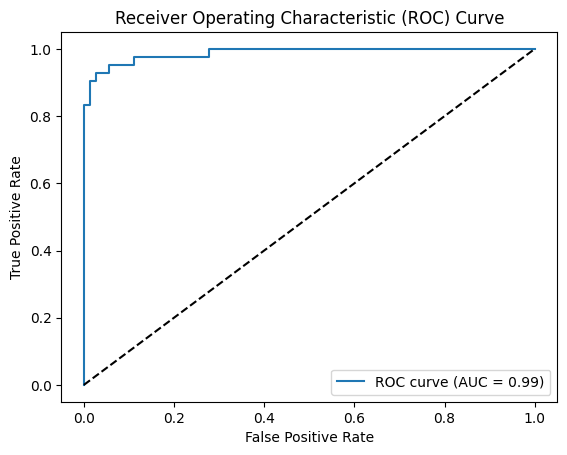

In [122]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
clf = LogisticRegression()
clf.fit(X_train, Y_train)
# Make predictions on the test data
Y_predict =clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_DT = accuracy_score(Y_test, Y_predict)
precision_M = precision_score(Y_test, Y_predict,pos_label='M')
precision_B = precision_score(Y_test, Y_predict,pos_label='B')
recall_M = recall_score(Y_test, Y_predict,pos_label='M')
recall_B = recall_score(Y_test, Y_predict,pos_label='B')
f1_M = f1_score(Y_test, Y_predict,pos_label='M')
f1_B= f1_score(Y_test, Y_predict,pos_label='B')
auc = roc_auc_score(Y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy_DT:", accuracy_DT)
print("Precision M:", precision_M)
print("Precision B:", precision_B)
print("Recall M:", recall_M)
print("Recall B:", recall_B)
print("F1 Score M:", f1_M)
print("F1 Score B:", f1_B)
print("AUC:", auc)

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba,pos_label='M')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy_RF: 0.9385964912280702
Precision M: 0.9714285714285714
Precision B: 0.9240506329113924
Recall M: 0.85
Recall B: 0.9864864864864865
F1 Score M: 0.9066666666666667
F1 Score B: 0.954248366013072
AUC: 0.9847972972972974


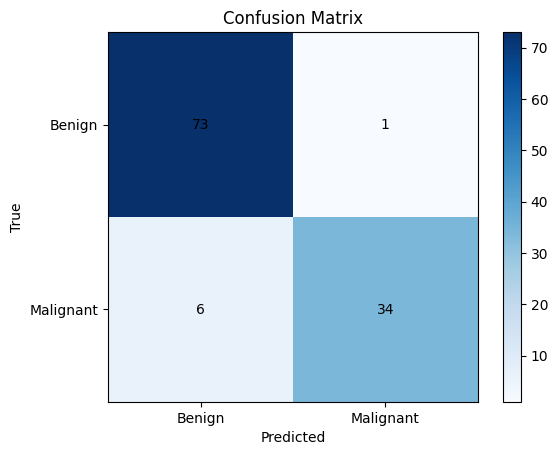

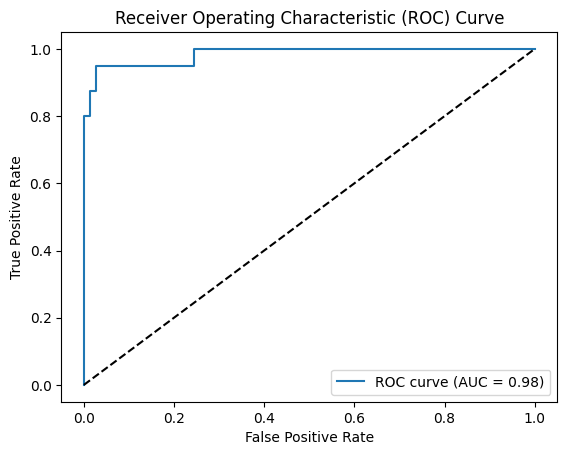

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 9)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
Y_predict =clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_RF = accuracy_score(Y_test, Y_predict)
precision_M = precision_score(Y_test, Y_predict,pos_label='M')
precision_B = precision_score(Y_test, Y_predict,pos_label='B')
recall_M = recall_score(Y_test, Y_predict,pos_label='M')
recall_B = recall_score(Y_test, Y_predict,pos_label='B')
f1_M = f1_score(Y_test, Y_predict,pos_label='M')
f1_B= f1_score(Y_test, Y_predict,pos_label='B')
auc = roc_auc_score(Y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy_RF:", accuracy_RF)
print("Precision M:", precision_M)
print("Precision B:", precision_B)
print("Recall M:", recall_M)
print("Recall B:", recall_B)
print("F1 Score M:", f1_M)
print("F1 Score B:", f1_B)
print("AUC:", auc)

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba,pos_label='M')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy_KNN: 0.9385964912280702
Precision M: 0.9
Precision B: 0.9594594594594594
Recall M: 0.9230769230769231
Recall B: 0.9466666666666667
F1 Score M: 0.9113924050632911
F1 Score B: 0.9530201342281879
AUC: 0.9904273504273504


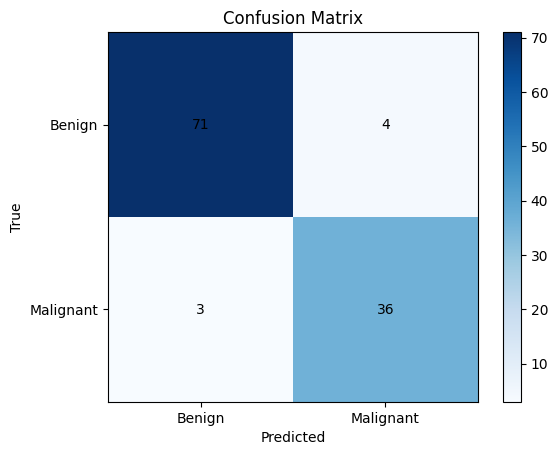

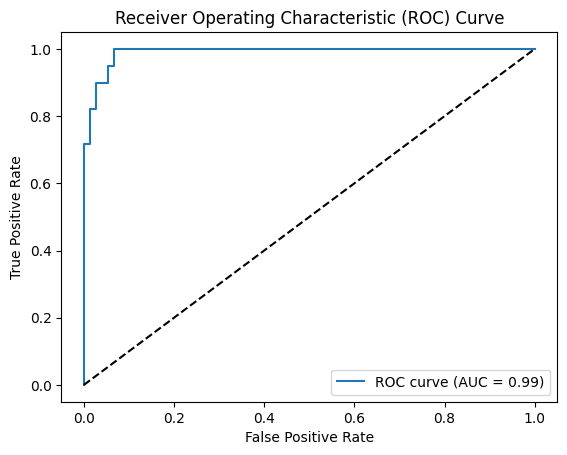

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
from sklearn.metrics import confusion_matrix, accuracy_score
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_predict =clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_KNN = accuracy_score(Y_test, Y_predict)
precision_M = precision_score(Y_test, Y_predict,pos_label='M')
precision_B = precision_score(Y_test, Y_predict,pos_label='B')
recall_M = recall_score(Y_test, Y_predict,pos_label='M')
recall_B = recall_score(Y_test, Y_predict,pos_label='B')
f1_M = f1_score(Y_test, Y_predict,pos_label='M')
f1_B= f1_score(Y_test, Y_predict,pos_label='B')
auc = roc_auc_score(Y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy_KNN:", accuracy_KNN)
print("Precision M:", precision_M)
print("Precision B:", precision_B)
print("Recall M:", recall_M)
print("Recall B:", recall_B)
print("F1 Score M:", f1_M)
print("F1 Score B:", f1_B)
print("AUC:", auc)

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba,pos_label='M')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



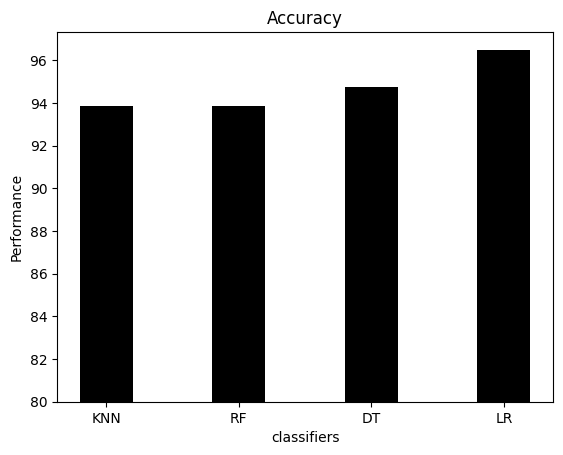

KNN       RF       DT   LR
93.86,93.86,94.74,96.49


In [128]:
left=[1,2,3,4]
# heights of bars

bottom =80
# labels for bars
height = [accuracy_KNN*100-bottom,accuracy_RF*100-bottom,accuracy_DT*100-bottom,accuracy_LR*100-bottom]
tick_label = ['KNN', 'RF', 'DT', 'LR']
plt.bar(left, height, tick_label=tick_label, width=0.4, bottom=bottom ,color=['black'])

# naming the x-axis
plt.xlabel('classifiers')
# naming the y-axis
plt.ylabel('Performance')
# plot title
plt.title('Accuracy')
plt.show()
print("KNN       RF       DT   LR")
print("%.2f,%.2f,%.2f,%.2f" %(accuracy_KNN*100,  accuracy_RF*100, accuracy_DT*100, accuracy_LR*100))

Logistic Regression:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979
AUC: 0.99737962659679

Random Forest:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
AUC: 0.9944317065181788

Decision Tree:
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394
F1 Score: 0.951048951048951

K-Nearest Neighbors (KNN):
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
AUC: 0.9819849328529315


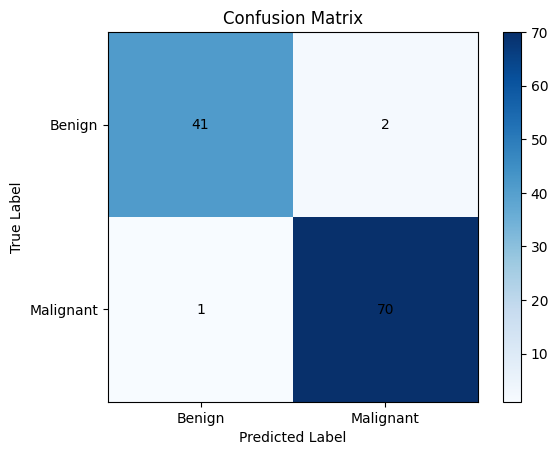

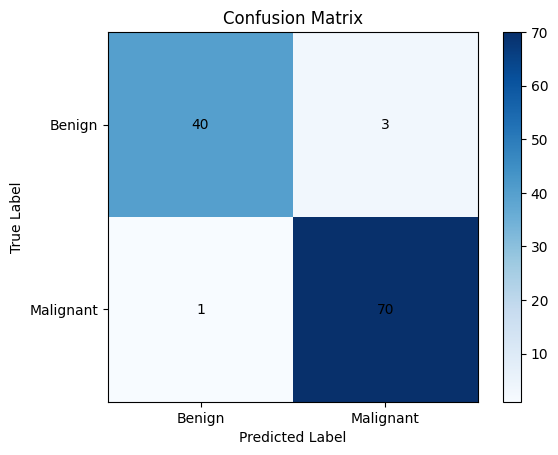

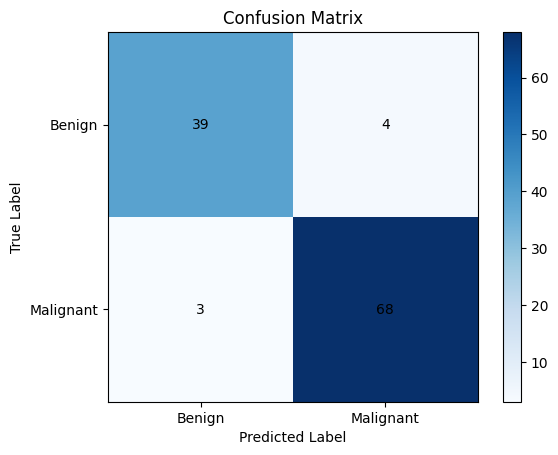

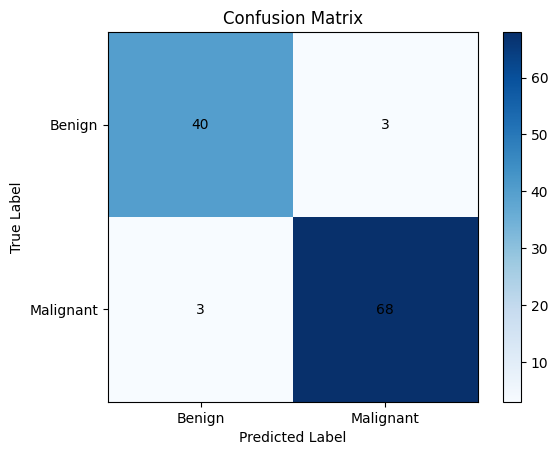

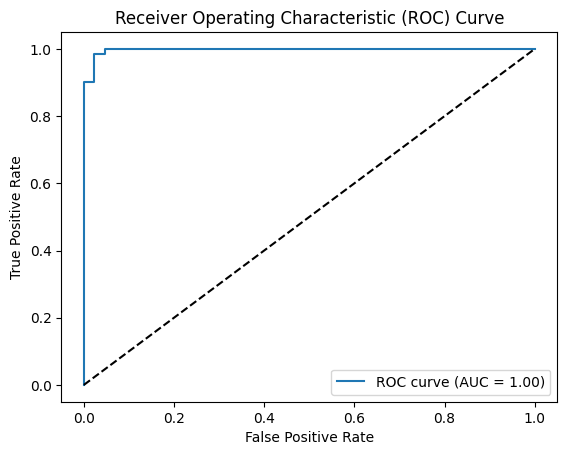

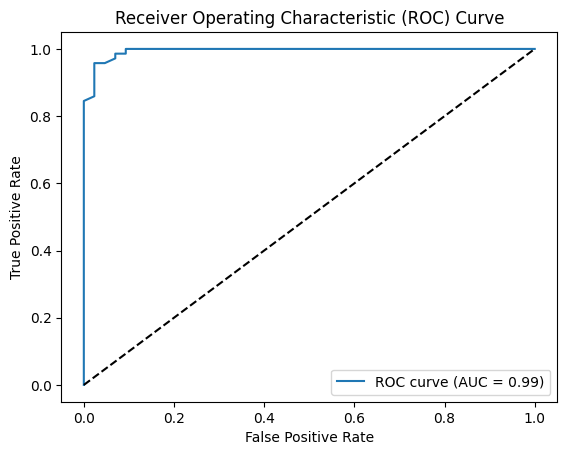

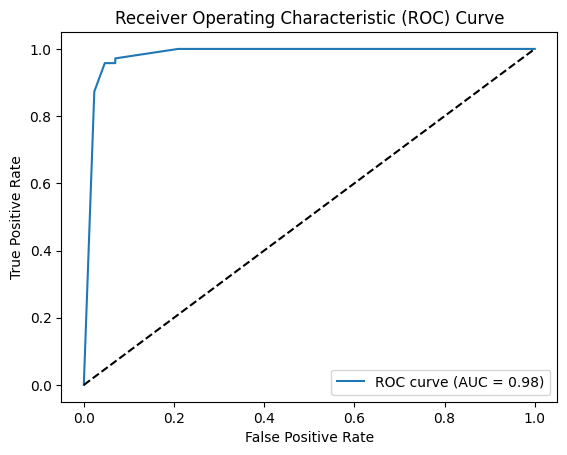

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Upsample the minority class (Malignant) if there are samples from both classes
if len(np.unique(y_train)) > 1:
    X_train_minority = X_train[y_train == 1]
    y_train_minority = y_train[y_train == 1]
    X_train = np.concatenate((X_train_minority, X_train[y_train == 0]), axis=0)
    y_train = np.concatenate((y_train_minority, y_train[y_train == 0]), axis=0)

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_y_pred = lr.predict(X_test)
    lr_y_pred_proba = lr.predict_proba(X_test)[:, 1]

    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_y_pred = rf.predict(X_test)
    rf_y_pred_proba = rf.predict_proba(X_test)[:, 1]

    # Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_y_pred = dt.predict(X_test)

    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_y_pred = knn.predict(X_test)
    knn_y_pred_proba = knn.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    lr_accuracy = accuracy_score(y_test, lr_y_pred)
    lr_precision = precision_score(y_test, lr_y_pred)
    lr_recall = recall_score(y_test, lr_y_pred)
    lr_f1 = f1_score(y_test, lr_y_pred)
    lr_auc = roc_auc_score(y_test, lr_y_pred_proba)

    rf_accuracy = accuracy_score(y_test, rf_y_pred)
    rf_precision = precision_score(y_test, rf_y_pred)
    rf_recall = recall_score(y_test, rf_y_pred)
    rf_f1 = f1_score(y_test, rf_y_pred)
    rf_auc = roc_auc_score(y_test, rf_y_pred_proba)

    dt_accuracy = accuracy_score(y_test, dt_y_pred)
    dt_precision = precision_score(y_test, dt_y_pred)
    dt_recall = recall_score(y_test, dt_y_pred)
    dt_f1 = f1_score(y_test, dt_y_pred)

    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_precision = precision_score(y_test, knn_y_pred)
    knn_recall = recall_score(y_test, knn_y_pred)
    knn_f1 = f1_score(y_test, knn_y_pred)
    knn_auc = roc_auc_score(y_test, knn_y_pred_proba)

    # Print evaluation metrics
    print("Logistic Regression:")
    print("Accuracy:", lr_accuracy)
    print("Precision:", lr_precision)
    print("Recall:", lr_recall)
    print("F1 Score:", lr_f1)
    print("AUC:", lr_auc)

    print("\nRandom Forest:")
    print("Accuracy:", rf_accuracy)
    print("Precision:", rf_precision)
    print("Recall:", rf_recall)
    print("F1 Score:", rf_f1)
    print("AUC:", rf_auc)

    print("\nDecision Tree:")
    print("Accuracy:", dt_accuracy)
    print("Precision:", dt_precision)
    print("Recall:", dt_recall)
    print("F1 Score:", dt_f1)

    print("\nK-Nearest Neighbors (KNN):")
    print("Accuracy:", knn_accuracy)
    print("Precision:", knn_precision)
    print("Recall:", knn_recall)
    print("F1 Score:", knn_f1)
    print("AUC:", knn_auc)

    # Plot confusion matrix
    def plot_confusion_matrix(cm, classes):
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes)
        plt.yticks(tick_marks, classes)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        for i in range(len(classes)):
            for j in range(len(classes)):
                plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
        plt.show()

    lr_cm = confusion_matrix(y_test, lr_y_pred)
    plot_confusion_matrix(lr_cm, ['Benign', 'Malignant'])

    rf_cm = confusion_matrix(y_test, rf_y_pred)
    plot_confusion_matrix(rf_cm, ['Benign', 'Malignant'])

    dt_cm = confusion_matrix(y_test, dt_y_pred)
    plot_confusion_matrix(dt_cm, ['Benign', 'Malignant'])

    knn_cm = confusion_matrix(y_test, knn_y_pred)
    plot_confusion_matrix(knn_cm, ['Benign', 'Malignant'])

    # Plot ROC curve
    def plot_roc_curve(fpr, tpr, auc):
        plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_pred_proba)
    plot_roc_curve(lr_fpr, lr_tpr, lr_auc)

    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_proba)
    plot_roc_curve(rf_fpr, rf_tpr, rf_auc)

    knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred_proba)
    plot_roc_curve(knn_fpr, knn_tpr, knn_auc)
else:
    print("The dataset contains only one class, which is not suitable for classification.")


Accuracy_sv: 0.9473684210526315
Precision M: 0.9361702127659575
Precision B: 0.9552238805970149
Recall M: 0.9361702127659575
Recall B: 0.9552238805970149
F1 Score M: 0.9361702127659575
F1 Score B: 0.9552238805970149
AUC: 0.9926960939980946


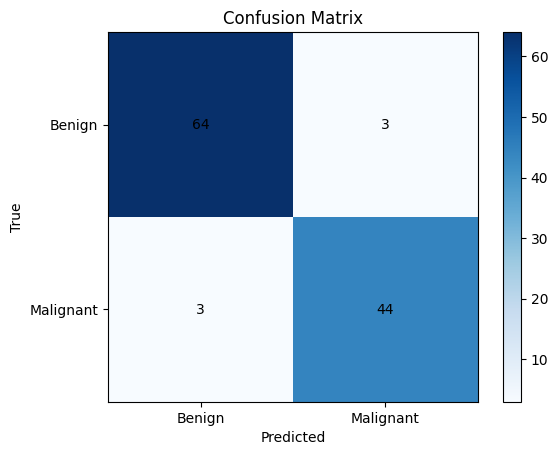

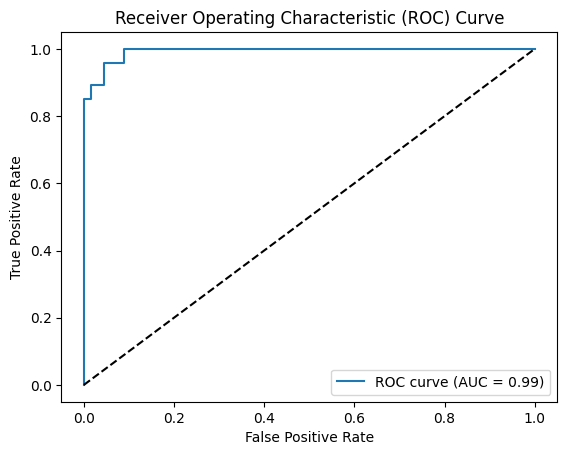

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state =0)#SVM
from sklearn.svm import SVC #SVM
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_predict =clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_svm = accuracy_score(Y_test, Y_predict)
precision_M = precision_score(Y_test, Y_predict,pos_label='M')
precision_B = precision_score(Y_test, Y_predict,pos_label='B')
recall_M = recall_score(Y_test, Y_predict,pos_label='M')
recall_B = recall_score(Y_test, Y_predict,pos_label='B')
f1_M = f1_score(Y_test, Y_predict,pos_label='M')
f1_B= f1_score(Y_test, Y_predict,pos_label='B')
auc = roc_auc_score(Y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy_sv:", accuracy_svm)
print("Precision M:", precision_M)
print("Precision B:", precision_B)
print("Recall M:", recall_M)
print("Recall B:", recall_B)
print("F1 Score M:", f1_M)
print("F1 Score B:", f1_B)
print("AUC:", auc)

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba,pos_label='M')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy_sv: 0.9385964912280702
Precision M: 0.9512195121951219
Precision B: 0.9315068493150684
Recall M: 0.8863636363636364
Recall B: 0.9714285714285714
F1 Score M: 0.9176470588235294
F1 Score B: 0.9510489510489512
AUC: 0.9899350649350649


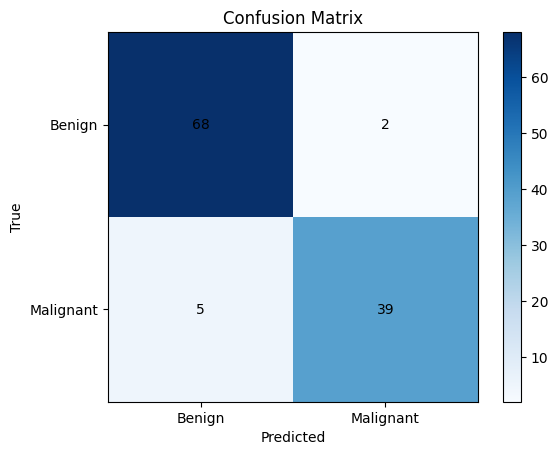

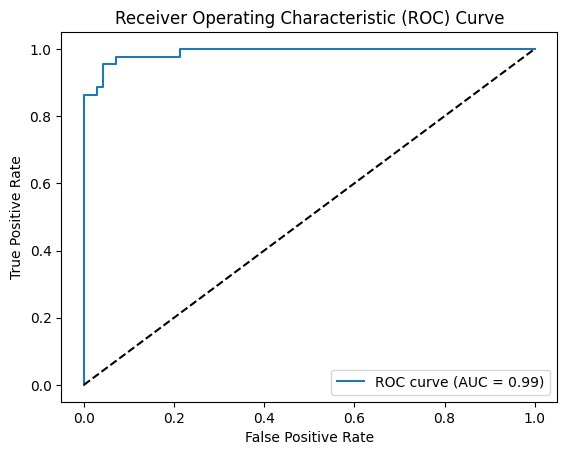

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 76)#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_predict =clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_svm = accuracy_score(Y_test, Y_predict)
precision_M = precision_score(Y_test, Y_predict,pos_label='M')
precision_B = precision_score(Y_test, Y_predict,pos_label='B')
recall_M = recall_score(Y_test, Y_predict,pos_label='M')
recall_B = recall_score(Y_test, Y_predict,pos_label='B')
f1_M = f1_score(Y_test, Y_predict,pos_label='M')
f1_B= f1_score(Y_test, Y_predict,pos_label='B')
auc = roc_auc_score(Y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy_sv:", accuracy_svm)
print("Precision M:", precision_M)
print("Precision B:", precision_B)
print("Recall M:", recall_M)
print("Recall B:", recall_B)
print("F1 Score M:", f1_M)
print("F1 Score B:", f1_B)
print("AUC:", auc)

# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_predict)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Benign', 'Malignant'])
plt.yticks(tick_marks, ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba,pos_label='M')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
